# QF623 - Portfolio Management

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize
import statsmodels.api as sm

import warnings

import pandas as pd
from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [2]:
# !pip install cvxpy

In [3]:
# Book-to-price ratio (Monthly)
value_weight_bookprice = pd.read_csv('6_Portfolios_2x3.csv', skiprows=15, nrows=1138, parse_dates=True, index_col=0, date_parser=lambda x:pd.to_datetime(x, format='%Y%m'))
equal_weight_bookprice = pd.read_csv('6_Portfolios_2x3.csv', skiprows=1157, nrows=1138, parse_dates=True, index_col=0, date_parser=lambda x:pd.to_datetime(x, format='%Y%m'))

# Cashflow-to-price (Monthly)
value_weight_cashflowprice = pd.read_csv('6_Portfolios_ME_CFP_2x3.csv', skiprows=19, nrows=838, parse_dates=True, index_col=0, date_parser=lambda x:pd.to_datetime(x, format='%Y%m'))
equal_weight_cashflowprice = pd.read_csv('6_Portfolios_ME_CFP_2x3.csv', skiprows=861, nrows=838, parse_dates=True, index_col=0, date_parser=lambda x:pd.to_datetime(x, format='%Y%m'))

# Dividend Yield(Monthly)
value_weight_divd = pd.read_csv('6_Portfolios_ME_DP_2x3.csv', skiprows=19, nrows=1126, parse_dates=True, index_col=0, date_parser=lambda x:pd.to_datetime(x, format='%Y%m'))
equal_weight_divd = pd.read_csv('6_Portfolios_ME_DP_2x3.csv', skiprows=1149, nrows=1126, parse_dates=True, index_col=0, date_parser=lambda x:pd.to_datetime(x, format='%Y%m'))

# Profitability (Monthly)
value_weight_profit = pd.read_csv('6_Portfolios_ME_OP_2x3.csv', skiprows=22, nrows=694, parse_dates=True, index_col=0, date_parser=lambda x:pd.to_datetime(x, format='%Y%m'))
equal_weight_profit = pd.read_csv('6_Portfolios_ME_OP_2x3.csv', skiprows=720, nrows=694, parse_dates=True, index_col=0, date_parser=lambda x:pd.to_datetime(x, format='%Y%m'))

# 12-1 price momentum (Monthly)
value_weight_12mom = pd.read_csv('6_Portfolios_ME_Prior_12_2.csv', skiprows=11, nrows=1132, parse_dates=True, index_col=0, date_parser=lambda x:pd.to_datetime(x, format='%Y%m'))
equal_weight_12mom = pd.read_csv('6_Portfolios_ME_Prior_12_2.csv', skiprows=1147, nrows=1132, parse_dates=True, index_col=0, date_parser=lambda x:pd.to_datetime(x, format='%Y%m'))

# 1-month return prior (Monthly)
value_weight_1mom = pd.read_csv('6_Portfolios_ME_Prior_1_0.csv', skiprows=11, nrows=1143, parse_dates=True, index_col=0, date_parser=lambda x:pd.to_datetime(x, format='%Y%m'))
equal_weight_1mom = pd.read_csv('6_Portfolios_ME_Prior_1_0.csv', skiprows=1158, nrows=1143, parse_dates=True, index_col=0, date_parser=lambda x:pd.to_datetime(x, format='%Y%m'))

# Investment (Monthly)
value_weight_invest = pd.read_csv('6_Portfolios_ME_INV_2x3.csv', skiprows=16, nrows=694, parse_dates=True, index_col=0, date_parser=lambda x:pd.to_datetime(x, format='%Y%m'))
equal_weight_invest = pd.read_csv('6_Portfolios_ME_INV_2x3.csv', skiprows=714, nrows=694, parse_dates=True, index_col=0, date_parser=lambda x:pd.to_datetime(x, format='%Y%m'))

# fama french data factors
ff_returns = pd.read_csv('F-F_Research_Data_Factors.csv', skiprows=3, nrows=1138, parse_dates=True, index_col=0, date_parser=lambda x:pd.to_datetime(x, format='%Y%m'))

In [4]:
reorder = lambda x: x[[x.columns[2],x.columns[1],x.columns[0],x.columns[5],x.columns[4],x.columns[3]]]

value_weight_invest, equal_weight_invest = reorder(value_weight_invest), reorder(equal_weight_invest)

In [5]:
# synchronizing every time series to start at the same date (the time series with the latest start date)
value_weight = [value_weight_bookprice, value_weight_cashflowprice, value_weight_divd, value_weight_invest, value_weight_profit, value_weight_1mom, value_weight_12mom]
latest_start_val = max([value_weight[i].index[0] for i in range(7)]) # find the time series with the latest date
value_weight = [value_weight[i][value_weight[i].index.get_loc(latest_start_val):] for i in range(7)]

equal_weight = [equal_weight_bookprice, equal_weight_cashflowprice, equal_weight_divd, equal_weight_invest, equal_weight_profit, equal_weight_1mom, equal_weight_12mom]
latest_start_eq = max([value_weight[i].index[0] for i in range(7)]) # find the time series with the latest date
equal_weight = [equal_weight[i][equal_weight[i].index.get_loc(latest_start_eq):] for i in range(7)]

fundamental_title = ['Book-to-Price', 'Cash-to-Price', 'Dividend Yield', 'Investment', 'Profitability', 'Prior Month Return', '12-1 Momentum']

### 1A) For each of the seven fundamental variables, construct long-short factor mimicking portfolios and plot their historical performance across different size segments.

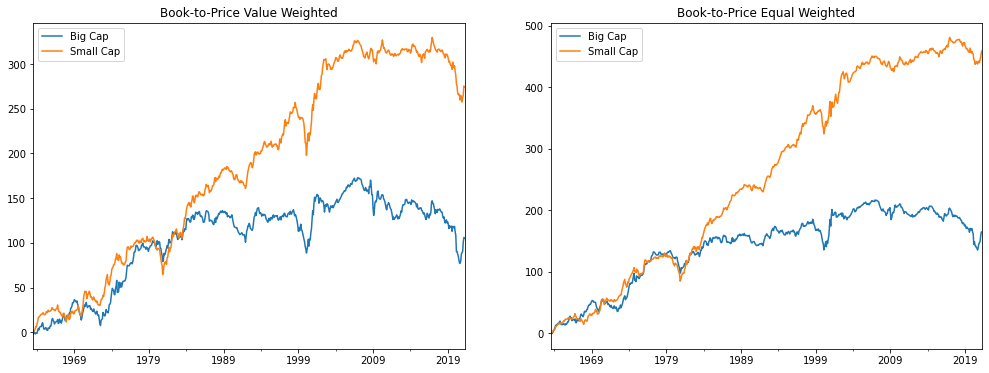

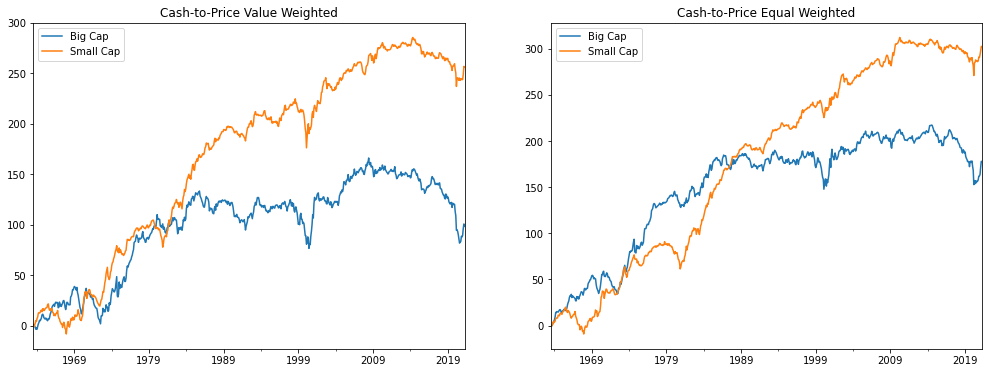

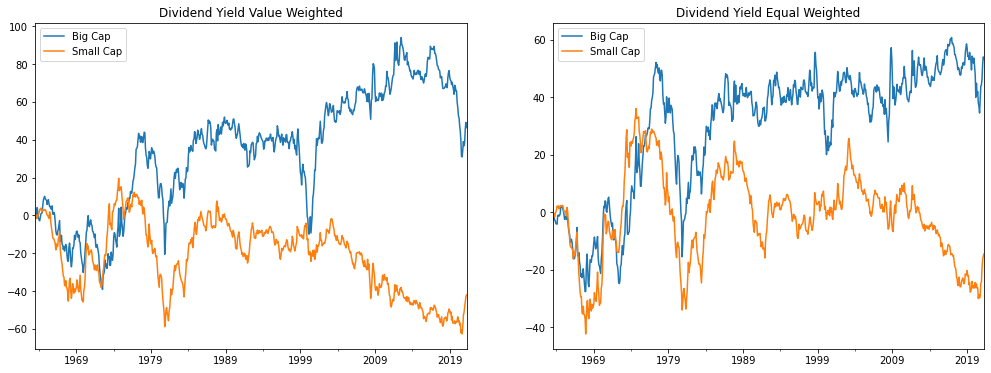

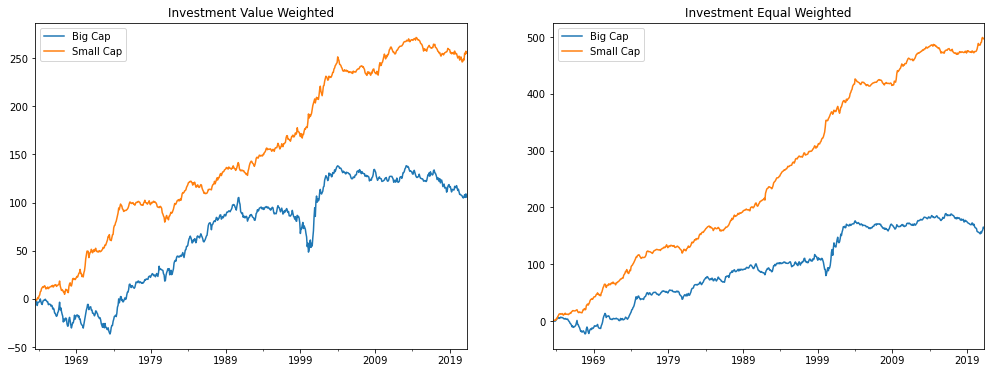

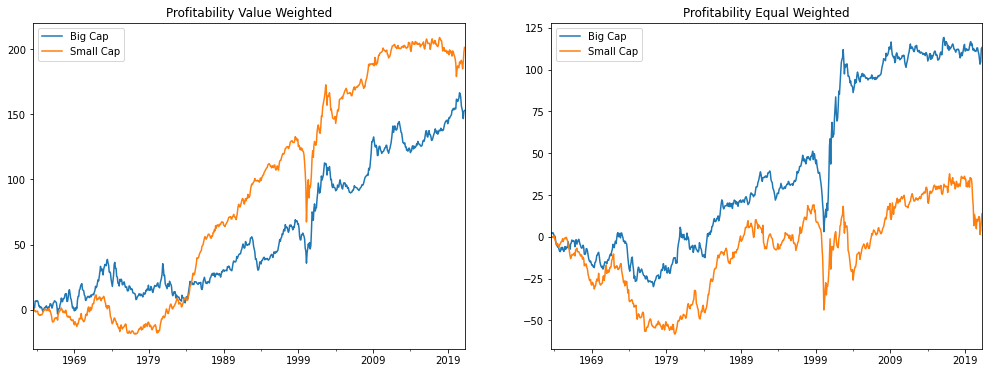

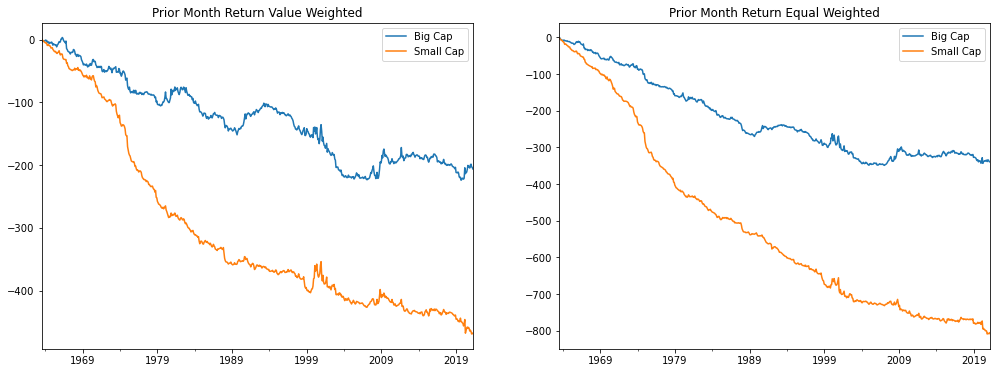

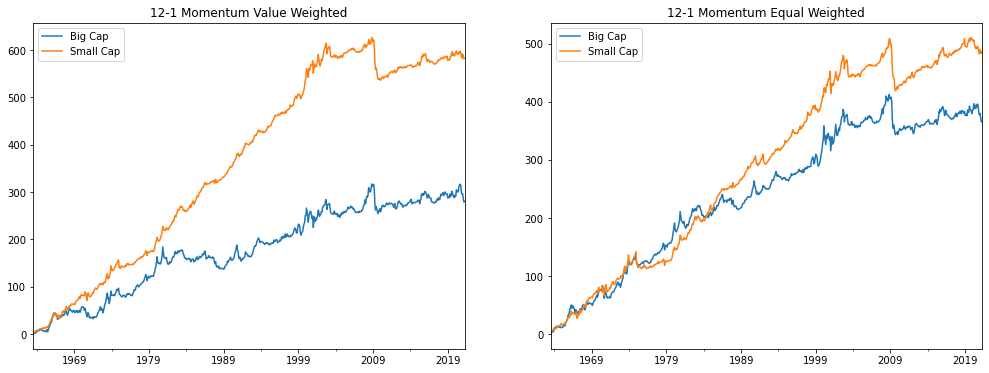

In [6]:
for i in range(len(fundamental_title)):
    value_weight[i]['Big Cap'] = (value_weight[i].iloc[:,5] - value_weight[i].iloc[:,3]).cumsum()
    value_weight[i]['Small Cap'] = (value_weight[i].iloc[:,2] - value_weight[i].iloc[:,0]).cumsum()
    
    equal_weight[i]['Big Cap'] = (equal_weight[i].iloc[:,5] - equal_weight[i].iloc[:,3]).cumsum()
    equal_weight[i]['Small Cap'] = (equal_weight[i].iloc[:,2] - equal_weight[i].iloc[:,0]).cumsum()

    fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(17,6))
    value_weight[i][['Big Cap','Small Cap']].plot(title = fundamental_title[i] + ' Value Weighted',ax=axes[0])
    equal_weight[i][['Big Cap','Small Cap']].plot(title = fundamental_title[i] + ' Equal Weighted',ax=axes[1])


In [6]:
import cvxpy as cvx
from cvxpy import *

class processing:
    
    def __init__(self):
        
        self.df_ = []
    
    def FactrosReturnDataFrame(self,factors,expectedReturn):
        for i in range(0,len(factors)):
            data = pd.concat([factors[i],expectedReturn],ignore_index = False,axis =1,join ='inner')
            data["small_lo"] = data.iloc[:,0] - data["RF"]
            data["small_hi"] = data.iloc[:,2]  - data["RF"]
            data["Big_lo"] = data.iloc[:,3] - data["RF"]
            data["Big_hi"] = data.iloc[:,5] - data["RF"]
            self.df_.append(data[["small_lo","small_hi","Big_lo","Big_hi","Mkt-RF"]])
            #self.df_ = pd.concat([value_prior,ff],ignore_index = False,axis =1,join ='inner')
        
        return self.df_
    
    def regress(self,dataframe):
    
        df = dataframe
        excess_ret = sm.add_constant( df["Mkt-RF"])
        
        small_hi_alpha, small_lo_alpha, big_hi_alpha, big_lo_alpha  = [], [], [], []
        small_hi_beta, small_lo_beta, big_hi_beta, big_lo_beta = [], [], [], []
    
        for i in np.arange(0,len(df)+1,1):
            # small cap hi
            if len(df["small_hi"][i:i+36]) == 36: #ensuring that range is 36 months
                est_1 = sm.OLS(df["small_hi"][i:i+36], excess_ret[i:i+36]).fit()
                small_hi_alpha.append(est_1.params[0]); small_hi_beta.append(est_1.params[1])
            # small cap lo
            if len(df["small_lo"][i:i+36]) == 36: #ensuring that range is 36 months
                est_2 = sm.OLS(df["small_lo"][i:i+36], excess_ret[i:i+36]).fit()
                small_lo_alpha.append(est_2.params[0]); small_lo_beta.append(est_2.params[1])
            # big cap hi
            if len(df["Big_hi"][i:i+36]) == 36: #ensuring that range is 36 months
                est_3 = sm.OLS(df["Big_hi"][i:i+36], excess_ret[i:i+36]).fit()
                big_hi_alpha.append(est_3.params[0]); big_hi_beta.append(est_3.params[1])
            # big cap lo
            if len(df["Big_lo"][i:i+36]) == 36: #ensuring that range is 36 months
                est_4 = sm.OLS(df["Big_lo"][i:i+36], excess_ret[i:i+36]).fit()
                big_lo_alpha.append(est_4.params[0]); big_lo_beta.append(est_4.params[1])


        table = pd.DataFrame({'small_hi_alpha': small_hi_alpha, 'small_lo_alpha': small_lo_alpha,\
                              'big_hi_alpha': big_hi_alpha, 'big_lo_alpha': big_lo_alpha,\
                              'small_hi_beta': small_hi_beta, 'small_lo_beta': small_lo_beta,\
                              'big_hi_beta': big_hi_beta, 'big_lo_beta': big_lo_beta,'date': df.iloc[:,0][35:len(df)]})


        return table.drop(columns=['date'])

    
    def optimization(self,regressed_df):

        w_big_lo, w_small_lo, w_big_hi, w_small_hi = [], [], [], []
        agg_alpha = []
        status = []
        lambd = 0.1 # cash reserve as a proportion of shorting stocks

        for i in np.arange(0,len(regressed_df),1): # len(df)-1

            # cvx variables of individual weights
            p1 = cvx.Variable() # short big cap lo weight
            p2 = cvx.Variable() # short small cap lo weight
            p3 = cvx.Variable() # long big cap hi weight
            p4 = cvx.Variable() # long small cap hi weight

            # sum of weight * beta = 0, p3 + p4 - 0.1*(p1 + p2) == 1
            constraints = [p1 <= 0, p2 <= 0, p3 >= 0, p4 >= 0,\
                        sum([p3*regressed_df['big_hi_beta'][i], p4*regressed_df['small_hi_beta'][i], \
                        p1*regressed_df['big_lo_beta'][i], p2*regressed_df['small_lo_beta'][i]]) == 0,\
                        p3 + p4 - 0.1*(p1 + p2) == 1] #

            obj = cvx.Maximize(sum([p1*regressed_df['big_lo_alpha'][i], p2*regressed_df['small_lo_alpha'][i], \
                                    p3*regressed_df['big_hi_alpha'][i], p4*regressed_df['small_hi_alpha'][i]]))
            
            prob = cvx.Problem(obj, constraints)
            prob.solve() 
            status.append(prob.status); agg_alpha.append(prob.value); w_big_lo.append(p1.value); \
            w_small_lo.append(p2.value); w_big_hi.append(p3.value); w_small_hi.append(p4.value)

        weights_table = pd.DataFrame({'status': status, 'agg_alpha': agg_alpha, 'w_big_lo': w_big_lo, \
                                      'w_small_lo': w_small_lo, 'w_big_hi': w_big_hi, 'w_small_hi': w_small_hi})
        
        
        return weights_table
     
    def sum_of_betas(self,df,factorReturn,title):
        df_ = processing().regress(pd.DataFrame(factorReturn))
        optimz = processing().optimization(df_)
        beta_values =  df_.reset_index()
        
        beta_weights_ = processing().optimization(df_)
        beta_times_weights = beta_values['big_hi_beta'] * beta_weights_['w_big_hi'] + \
        beta_values['small_hi_beta'] * beta_weights_['w_small_hi'] + \
        beta_values['big_lo_beta'] * beta_weights_['w_big_lo'] + \
        beta_values['small_lo_beta'] * beta_weights_['w_small_lo']

        total_weights_table = pd.DataFrame({'Date': beta_values['index'], 'sum beta weights': beta_times_weights})
        total_weights_table.set_index('Date', inplace = True)
        plt.figure(figsize=(5,5))
        df_[["big_hi_beta","big_lo_beta","small_hi_beta","small_lo_beta"]].plot(figsize=(7,3))
        plt.legend(loc='lower right', ncol=2)
        plt.title('Beta' + ' - ' + title)
        plt.show()
        # Original Series

        plt.figure(figsize=(3,3))
        plt.plot(total_weights_table)
        plt.title('Beta Neutral : Weight' + ' - ' + title)
        plt.show()
        total_weights_table.to_csv(title+"_weight.csv")
    
    def beta_neutral_return(self,portfolio,factorReturn,market_return,title):
        optimz = processing().regress(pd.DataFrame(factorReturn))
        betaWghts= processing().optimization(optimz)
        readj_df = portfolio.iloc[36:len(portfolio)].reset_index() 
        f = lambda x, y: (x - y).cumsum() 
        # beta neutral returns = (beta wt * big_hi + beta wt * small_hi) - (beta wt * big_lo + beta wt * small_lo)
        beta_portfolio_hi = (betaWghts['w_big_hi'] * readj_df.iloc[:,6]) + (betaWghts['w_small_hi'] * readj_df.iloc[:,3])
        beta_portfolio_lo = 0.1 * ((betaWghts['w_big_lo'] * readj_df.iloc[:,4]) + (betaWghts['w_small_lo'] * readj_df.iloc[:,1]))
        rf_rate = market_return.iloc[:,3][36:len(ff_returns)]
        mkt_ret = market_return.iloc[:,0][36:len(ff_returns)]
        rate = market_return[["RF","Mkt-RF"]]
        betaNeu_vs_ls = pd.DataFrame({'Date': readj_df.iloc[:,0],'Beta Neutral': f(beta_portfolio_hi,beta_portfolio_lo)})
        betaNeu_vs_ls.set_index('Date', inplace=True)
        betaNeu_vs_ls  = pd.concat([betaNeu_vs_ls,market_return[["RF","Mkt-RF"]]],ignore_index = False,axis =1,join ='inner')
    
        betaNeu_vs_ls[["Beta Neutral","RF","Mkt-RF"]].plot(figsize=(7,3))
        plt.title('Beta Neutral Return' + ' - ' + title)
        plt.show()
        df1 = pd.concat([beta_portfolio_hi,beta_portfolio_lo],ignore_index = False,axis=1)
        df1.columns  = ["beta_portfolio_hi","beta_portfolio_lo"]
        print("\t\t\t".format(title))
        df1.to_csv( title+"_betaNuetral.csv")
        #df1.columns = ["beta_portfolio_hi","beta_portfolio_lo","betaNeu_vs_ls"]
        #print(df.head(10))
        return betaNeu_vs_ls

### Part1: Taking the market return from Fama-French’s 3-factor model, calculate and plot the rolling 3-year market beta for these stylized portfolios.

## value weighted Calculations

<Figure size 360x360 with 0 Axes>

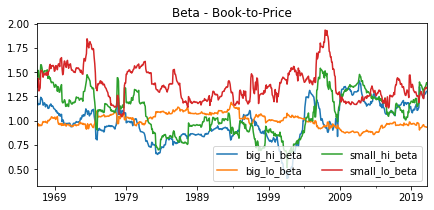

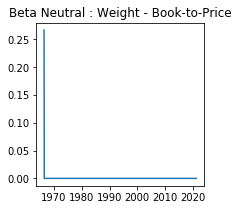

<Figure size 360x360 with 0 Axes>

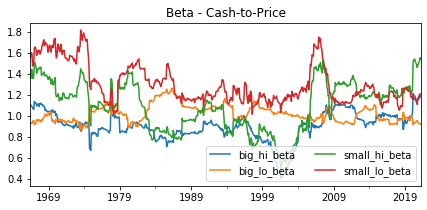

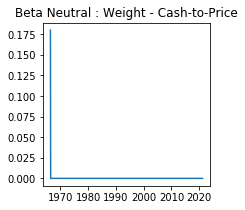

<Figure size 360x360 with 0 Axes>

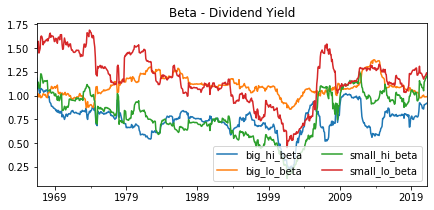

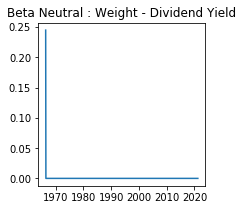

<Figure size 360x360 with 0 Axes>

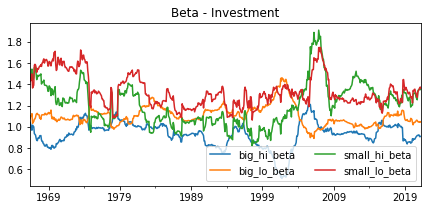

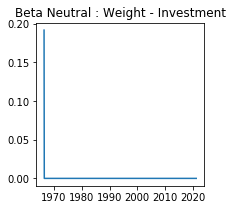

<Figure size 360x360 with 0 Axes>

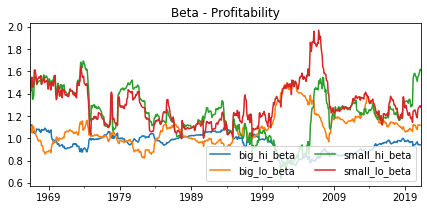

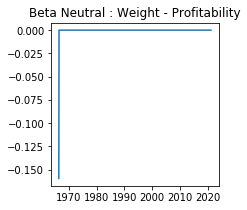

<Figure size 360x360 with 0 Axes>

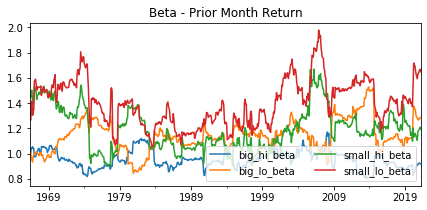

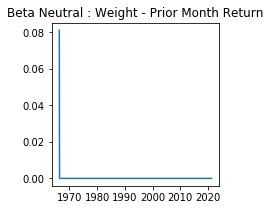

<Figure size 360x360 with 0 Axes>

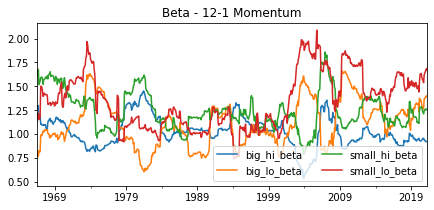

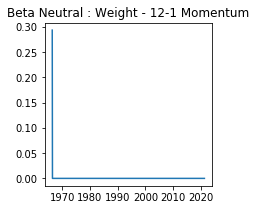

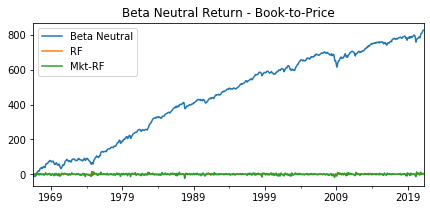

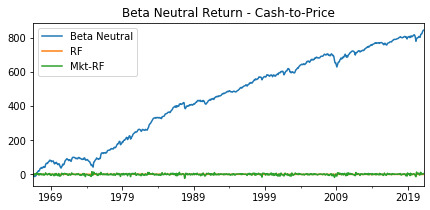

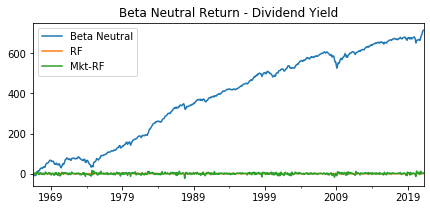

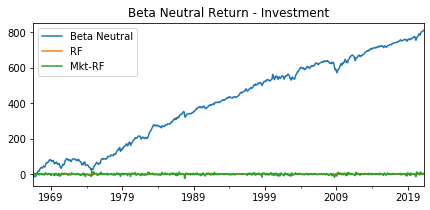

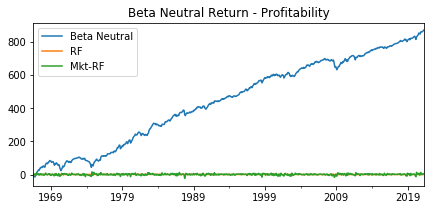

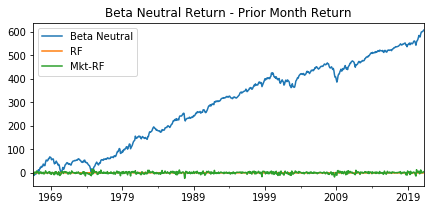

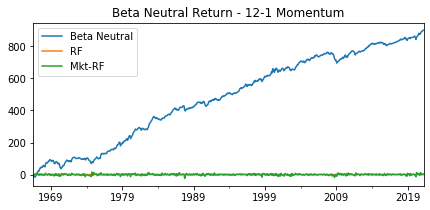

In [7]:
factorReturn= processing().FactrosReturnDataFrame(value_weight,ff_returns)
for i in range(0,len(fundamental_title),1):
    processing().sum_of_betas(value_weight[i],factorReturn[i],fundamental_title[i])
    
factorReturn= processing().FactrosReturnDataFrame(value_weight,ff_returns)
for i in range(0,len(fundamental_title),1):
    processing().beta_neutral_return(value_weight[i],factorReturn[i],ff_returns,fundamental_title[i])

#### Equal weight Calculations

<Figure size 360x360 with 0 Axes>

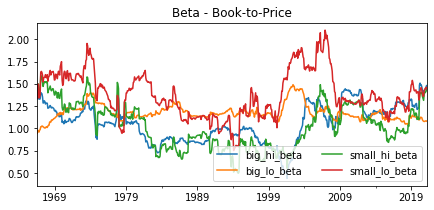

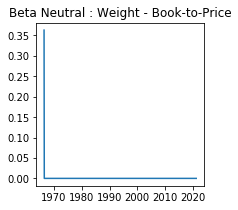

<Figure size 360x360 with 0 Axes>

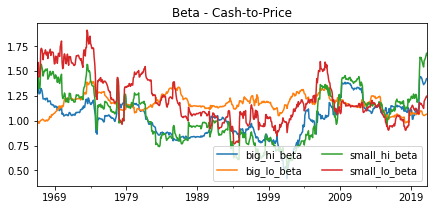

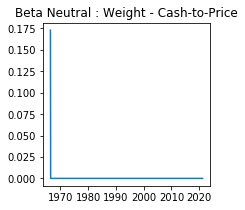

<Figure size 360x360 with 0 Axes>

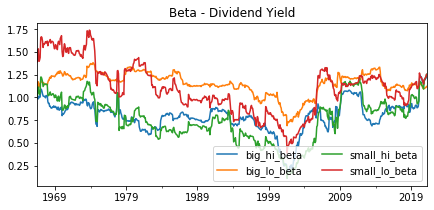

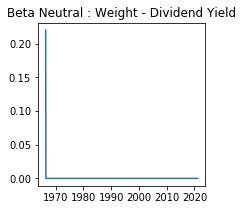

<Figure size 360x360 with 0 Axes>

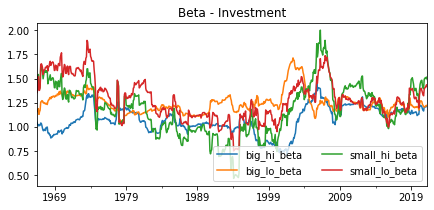

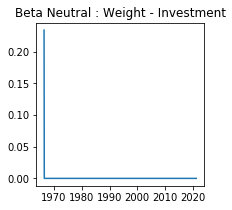

<Figure size 360x360 with 0 Axes>

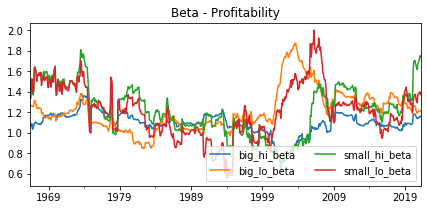

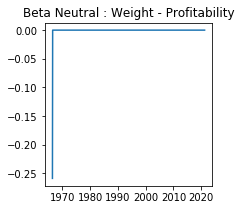

<Figure size 360x360 with 0 Axes>

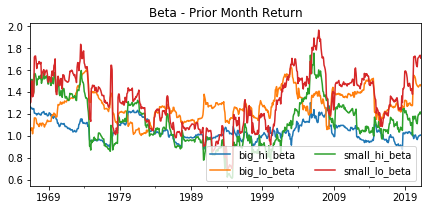

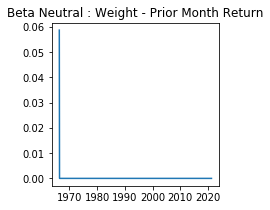

<Figure size 360x360 with 0 Axes>

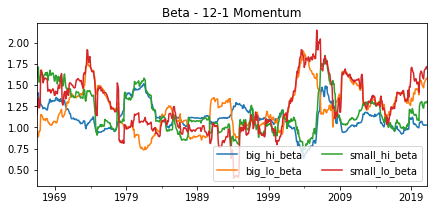

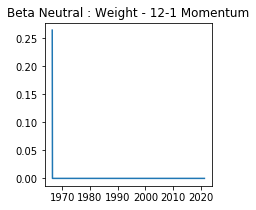

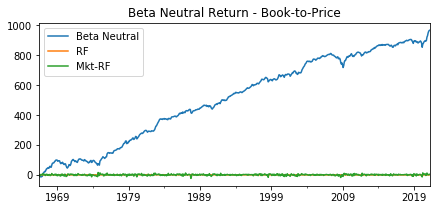

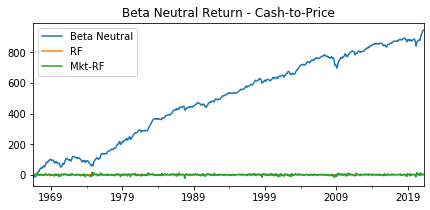

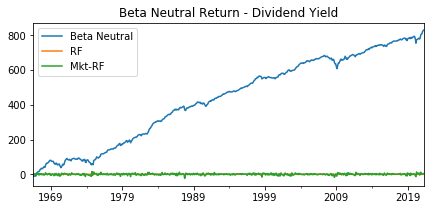

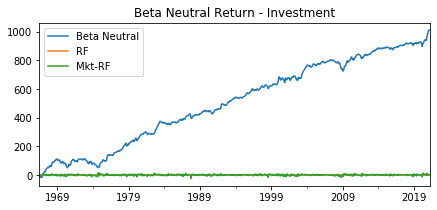

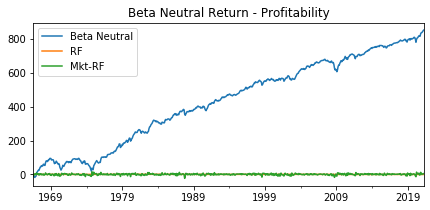

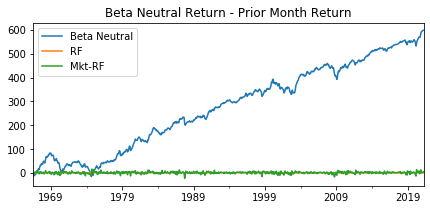

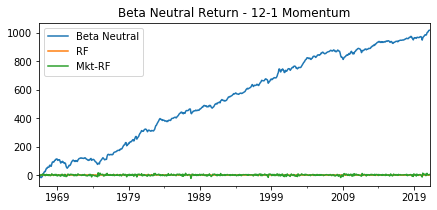

In [9]:
factorReturn= processing().FactrosReturnDataFrame(equal_weight,ff_returns)
for i in range(0,len(fundamental_title),1):
    processing().sum_of_betas(equal_weight[i],factorReturn[i],fundamental_title[i])
    
factorReturn= processing().FactrosReturnDataFrame(equal_weight,ff_returns)
for i in range(0,len(fundamental_title),1):
    processing().beta_neutral_return(equal_weight[i],factorReturn[i],ff_returns,fundamental_title[i])

## Part 2:

In [45]:
import numpy as np
import scipy.optimize
import warnings

def calc_weights(cov, x0=None, options=None, scale_factor=10000,
                 pcr_tolerance=0.001, ignore_objective=False):

    if not options:
        options = {'ftol': 1e-15, 'maxiter': 1000} #'ftol': 1e-4,

    def func(x):
        risk_contributions = x * cov.dot(x)
#         return (np.std(risk_contributions) * scale_factor)
        a = np.reshape(risk_contributions, (len(risk_contributions), 1))
        risk_diffs = a - a.transpose()
        sum_risk_diffs_squared = np.sum(np.square(np.ravel(risk_diffs)))
        return sum_risk_diffs_squared #/ scale_factor

    N = cov.shape[0]
    if x0 is None:
        x0 = 1 / np.sqrt(np.diag(cov))
        x0 = x0 / x0.sum()

    bounds = [(-1, 1) for i in range(N)]
    constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
    res = scipy.optimize.minimize(func, x0, method='SLSQP', bounds=bounds,
                                  constraints=constraints,
                                  options=options)

    weights = res.x

#     weights = weights - weights.mean() # dollar neutralize
#     mult = 1/weights[weights>0].sum() # scale up long position to 1
#     weights = weights * mult
    
    risk_squared = weights.dot(cov).dot(weights)
    pcrs = weights.dot(cov) * weights / risk_squared
    pcrs = np.reshape(pcrs, (len(pcrs), 1))
    pcr_max_diff = np.max(np.abs(pcrs - pcrs.transpose()))
    
    if not res.success:
        if (pcr_max_diff < pcr_tolerance):
            return weights
        else:
            msg = ("Max difference in percentage contribution to risk "
                   "in decimals is {0:.2E}, "
                   "tolerance is {1:.2E}".format(pcr_max_diff, pcr_tolerance))
            warnings.warn(msg)
            raise RuntimeError(res)
    if pcr_max_diff > pcr_tolerance:
        print(pcrs)
        raise RuntimeError("Max difference in percentage contribution to risk "
                           "in decimals is %s which exceeds tolerance of %s." %
                           (pcr_max_diff, pcr_tolerance))
        

    return weights

In [46]:
for i in range(len(fundamental_title)):
    value_weight[i]['Big Cap gap'] = (value_weight[i].iloc[:,5] - value_weight[i].iloc[:,3])
    value_weight[i]['Small Cap gap'] = (value_weight[i].iloc[:,2] - value_weight[i].iloc[:,0])
    
    equal_weight[i]['Big Cap gap'] = (equal_weight[i].iloc[:,5] - equal_weight[i].iloc[:,3])
    equal_weight[i]['Small Cap gap'] = (equal_weight[i].iloc[:,2] - equal_weight[i].iloc[:,0])

### Value-weighted

#### Big Cap

In [47]:
weighting = ['value_weighted', 'equal_weighted']
sizes = ['Big Cap gap', 'Small Cap gap']

In [48]:
def part_2(weighting_df, size):
    
    df = pd.DataFrame()
    
    # iterate through to extract relevant data (by fundamentals)
    for i in np.arange(len(fundamental_title)):
        title = fundamental_title[i]

        data = weighting_df[i][[size]]
        data.rename(columns = {size: title}, inplace = True)
        if df.empty: # if empty, replace by the data
            df = data 
        else:
            # match data by date/index
            df = pd.merge(df, data, left_index = True, right_index = True) 
    
    # intermediate output
    corr_matrix = df.corr()
    
    # Rolling window 
    years = 5
    rolling_window = 12 * years
    
    ERC_weights_df = pd.DataFrame(columns=df.columns,
                             index = df.index)
    
    
    for i in range(rolling_window, len(df)):
        temp = df.iloc[i - rolling_window:i]
        weights = calc_weights(temp.cov().values)
        index = df.index[i]
        ERC_weights_df.loc[index] = weights
        
    ERC_weights_df.dropna(inplace = True)
    EW_weights_df = pd.DataFrame(1/len(df.columns), columns=df.columns,
                             index = ERC_weights_df.index)
    df = df.loc[ERC_weights_df.index]

    return corr_matrix, ERC_weights_df, EW_weights_df, df



In [49]:
# VW = Value-weighted, EW = equal-weighted
# B = big cap, S = small cap

In [50]:
# value-weight
# Big Cap
VW_B = []
VW_B.append(part_2(value_weight, sizes[0]))

In [51]:
# value-weight
# Small Cap
VW_S = []
VW_S.append(part_2(value_weight, sizes[1]))

In [52]:
# equal-weight
# Big Cap
EW_B = []
EW_B.append(part_2(equal_weight, sizes[0]))

In [53]:
# equal-weight
# Small Cap
EW_S = []
EW_S.append(part_2(equal_weight, sizes[1]))

In [54]:
mapping = {'Value Weight': {'Big Cap': VW_B, 'Small Cap': VW_S},
           'Equal Weight': {'Big Cap': EW_B, 'Small Cap': EW_S}}

In [55]:
def generate_results(weighting, size):
    data = mapping[weighting][size]
    corr = data[0][0]
    
    EW_returns = (data[0][2] * data[0][3].shift(-1)).sum(axis = 1)[:-1]
    ERC_returns = (data[0][1] * data[0][3].shift(-1)).sum(axis = 1)[:-1]

    EW_cum_returns = EW_returns.cumsum()
    ERC_cum_returns = ERC_returns.cumsum()

    EW_sharpe = (EW_returns.mean()/np.std(EW_returns))*np.sqrt(12) # convert monthly sharpe to annual
    ERC_sharpe = (ERC_returns.mean()/np.std(ERC_returns))*np.sqrt(12)

    EW_avg_annual_ret = EW_returns.mean()*12
    ERC_avg_annual_ret = ERC_returns.mean()*12
    
#     display(corr)
    display(corr.style.background_gradient(cmap='Blues'))
    
    plt.figure(figsize = (12,8))
    plt.plot(EW_cum_returns, label = 'EW')
    plt.plot(ERC_cum_returns, label = 'ERC')
    plt.legend(loc = 'best')
    plt.title(weighting + ' (' + size + ')')
    plt.show()
    
    df = data[0][1].copy()
    df.reset_index(inplace = True, drop = True)
    df.plot(kind = 'bar', figsize  =(16,8))
    plt.title('Monthly Factor Weights')
    plt.show()

    print('Strategy Performance')
    print("-------------------------------------------")
    print('ERC Performance:')
    print('ERC Annualized Sharpe: ' + str(ERC_sharpe))
    print('ERC Annualized Returns: ' + str(ERC_avg_annual_ret*100) + '%')

    print("-------------------------------------------")
    print('EW Performance:')
    print('EW Annualized Sharpe: ' + str(EW_sharpe))
    print('EW Annualized Returns: ' + str(EW_avg_annual_ret*100) + '%')


,Book-to-Price,Cash-to-Price,Dividend Yield,Investment,Profitability,Prior Month Return,12-1 Momentum
Book-to-Price,1.000000,0.747572,0.569776,0.518344,-0.352212,-0.089056,-0.278336
Cash-to-Price,0.747572,1.000000,0.636693,0.520327,-0.076445,0.016060,-0.127443
Dividend Yield,0.569776,0.636693,1.000000,0.589447,-0.068122,0.021941,-0.232488
Investment,0.518344,0.520327,0.589447,1.000000,-0.031979,0.076818,-0.071242
Profitability,-0.352212,-0.076445,-0.068122,-0.031979,1.000000,0.184756,0.256302
Prior Month Return,-0.089056,0.016060,0.021941,0.076818,0.184756,1.000000,0.261193
12-1 Momentum,-0.278336,-0.127443,-0.232488,-0.071242,0.256302,0.261193,1.000000


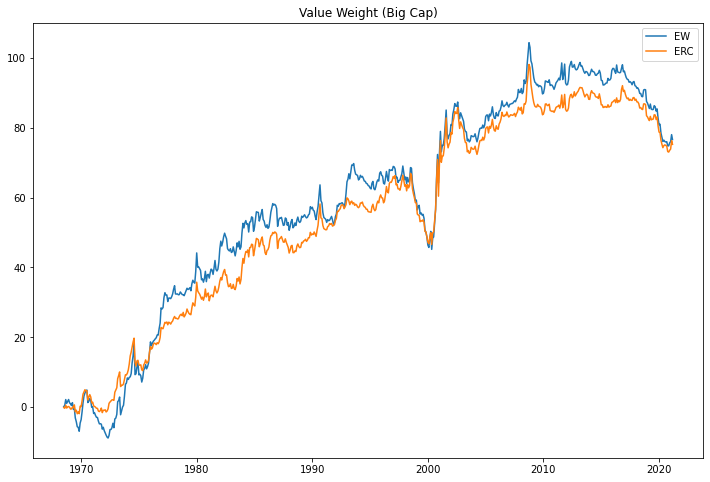

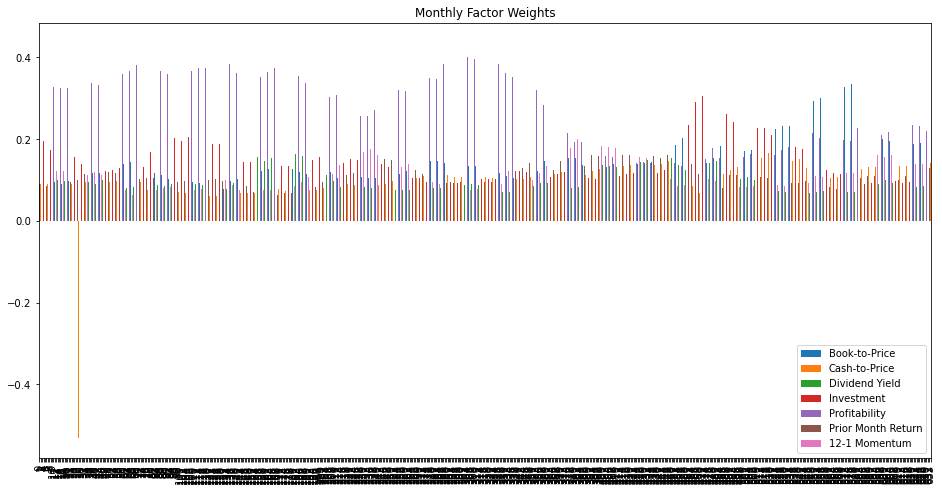

Strategy Performance
-------------------------------------------
ERC Performance:
ERC Annualized Sharpe: 0.2678448623519343
ERC Annualized Returns: 142.65573328211457%
-------------------------------------------
EW Performance:
EW Annualized Sharpe: 0.2420475057803834
EW Annualized Returns: 145.28590385917423%


,Book-to-Price,Cash-to-Price,Dividend Yield,Investment,Profitability,Prior Month Return,12-1 Momentum
Book-to-Price,1.000000,0.845679,0.618723,0.599310,0.354188,0.031965,-0.079441
Cash-to-Price,0.845679,1.000000,0.571422,0.450312,0.464309,-0.035785,-0.157543
Dividend Yield,0.618723,0.571422,1.000000,0.479264,0.071822,0.087764,-0.164503
Investment,0.599310,0.450312,0.479264,1.000000,-0.178983,0.118290,0.038878
Profitability,0.354188,0.464309,0.071822,-0.178983,1.000000,-0.052315,-0.046337
Prior Month Return,0.031965,-0.035785,0.087764,0.118290,-0.052315,1.000000,0.333335
12-1 Momentum,-0.079441,-0.157543,-0.164503,0.038878,-0.046337,0.333335,1.000000


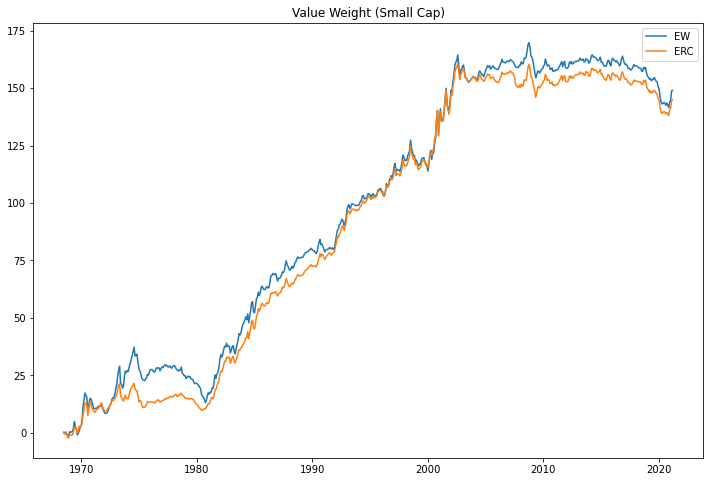

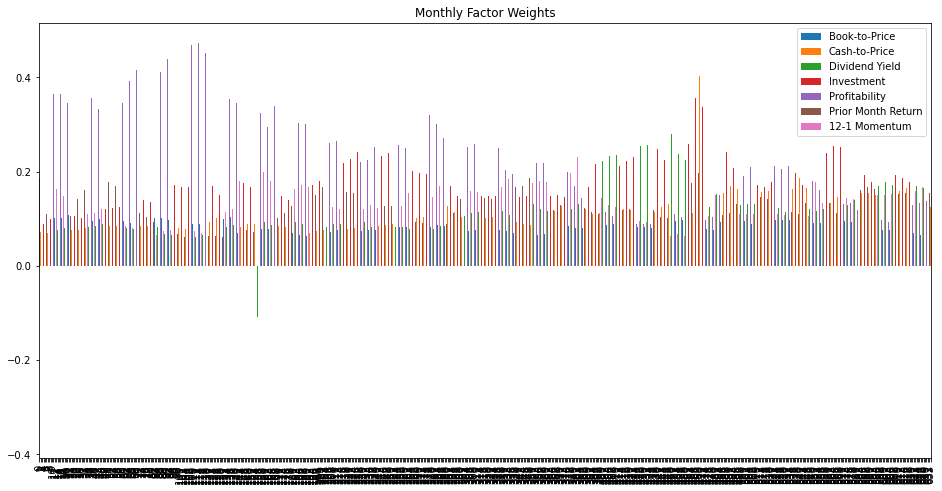

Strategy Performance
-------------------------------------------
ERC Performance:
ERC Annualized Sharpe: 0.5422142624217191
ERC Annualized Returns: 274.885577866234%
-------------------------------------------
EW Performance:
EW Annualized Sharpe: 0.48958050161087
EW Annualized Returns: 282.3750033852398%


,Book-to-Price,Cash-to-Price,Dividend Yield,Investment,Profitability,Prior Month Return,12-1 Momentum
Book-to-Price,1.000000,0.859065,0.654807,0.658119,0.046160,0.005377,-0.197951
Cash-to-Price,0.859065,1.000000,0.585693,0.553145,0.186719,0.035492,-0.129543
Dividend Yield,0.654807,0.585693,1.000000,0.568287,-0.058653,0.094663,-0.175161
Investment,0.658119,0.553145,0.568287,1.000000,0.238655,0.118394,-0.058084
Profitability,0.046160,0.186719,-0.058653,0.238655,1.000000,0.127575,0.189275
Prior Month Return,0.005377,0.035492,0.094663,0.118394,0.127575,1.000000,0.310783
12-1 Momentum,-0.197951,-0.129543,-0.175161,-0.058084,0.189275,0.310783,1.000000


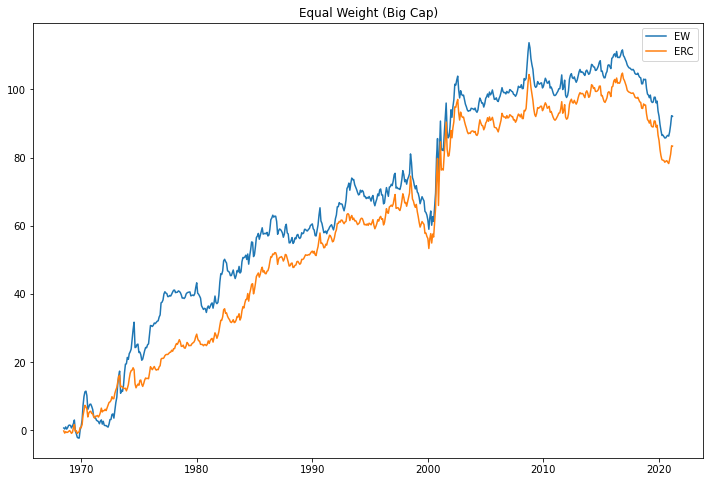

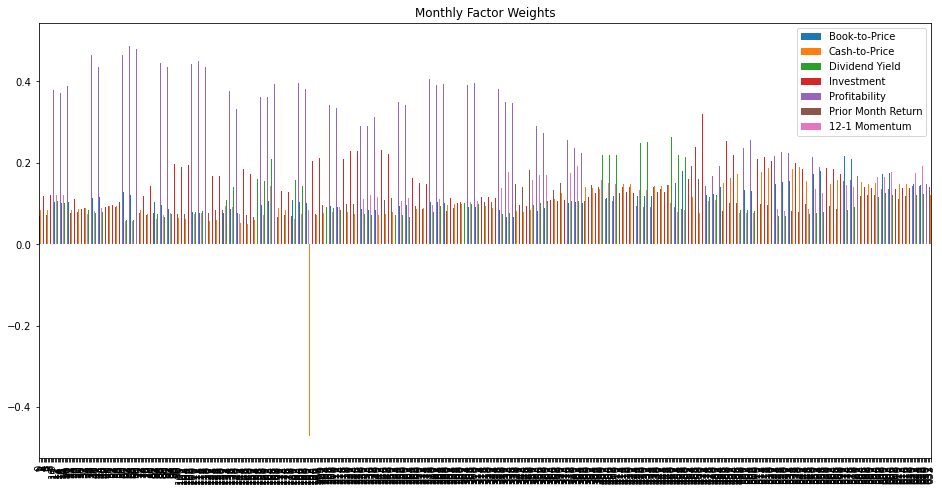

Strategy Performance
-------------------------------------------
ERC Performance:
ERC Annualized Sharpe: 0.29099760427811655
ERC Annualized Returns: 158.02359690757365%
-------------------------------------------
EW Performance:
EW Annualized Sharpe: 0.2830191270723885
EW Annualized Returns: 174.61278266756915%


,Book-to-Price,Cash-to-Price,Dividend Yield,Investment,Profitability,Prior Month Return,12-1 Momentum
Book-to-Price,1.000000,0.729455,0.570996,0.416365,0.316560,0.231482,0.140571
Cash-to-Price,0.729455,1.000000,0.577140,0.371881,0.323059,0.049116,-0.025923
Dividend Yield,0.570996,0.577140,1.000000,0.395845,0.004768,0.119735,-0.098687
Investment,0.416365,0.371881,0.395845,1.000000,-0.411271,0.013230,-0.123797
Profitability,0.316560,0.323059,0.004768,-0.411271,1.000000,0.216174,0.308415
Prior Month Return,0.231482,0.049116,0.119735,0.013230,0.216174,1.000000,0.478523
12-1 Momentum,0.140571,-0.025923,-0.098687,-0.123797,0.308415,0.478523,1.000000


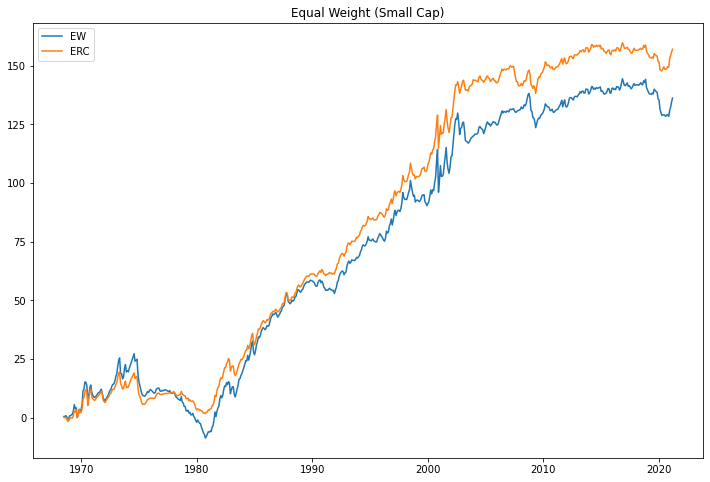

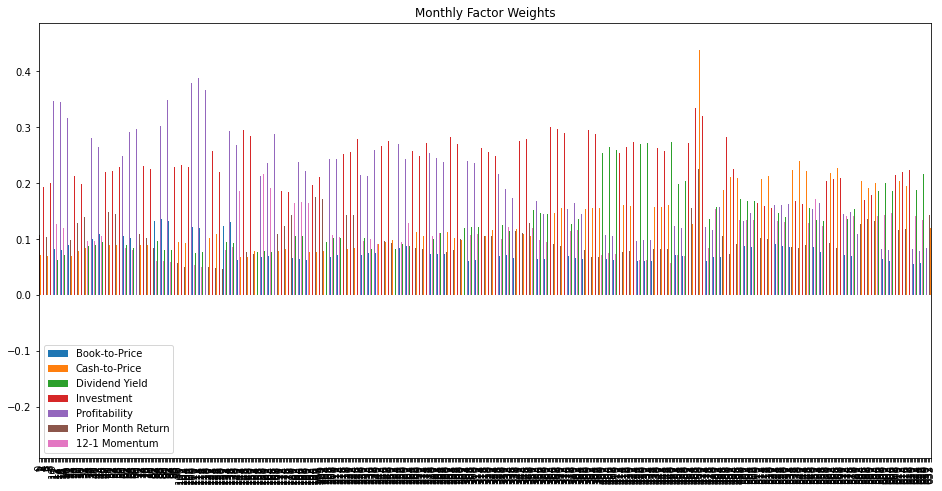

Strategy Performance
-------------------------------------------
ERC Performance:
ERC Annualized Sharpe: 0.5996033162210396
ERC Annualized Returns: 297.6171009307916%
-------------------------------------------
EW Performance:
EW Annualized Sharpe: 0.4298682076792949
EW Annualized Returns: 258.12498307379843%


In [56]:
for weighting, value in mapping.items():
    for size in value.keys():
        generate_results(weighting, size)

Part 3
Using different lookback periods of 1,12 and 36 months to determine factor persistence, build adaptive multi-factor models that appropriately reflect your view on each factor. For example, you may want to consider a factor weighting approach such that the factor allocation is proportional to the historical Sharpe ratio for a given lookback period. Comment on your results.

###  part 3

 factor persistence 

In [57]:
for weighting, value in mapping.items():
    print(weighting)

Value Weight
Equal Weight


In [58]:
def cum_ret(s):
    u =s.cumsum()
    return u

Text(0, 0.5, 'cumulative excess return')

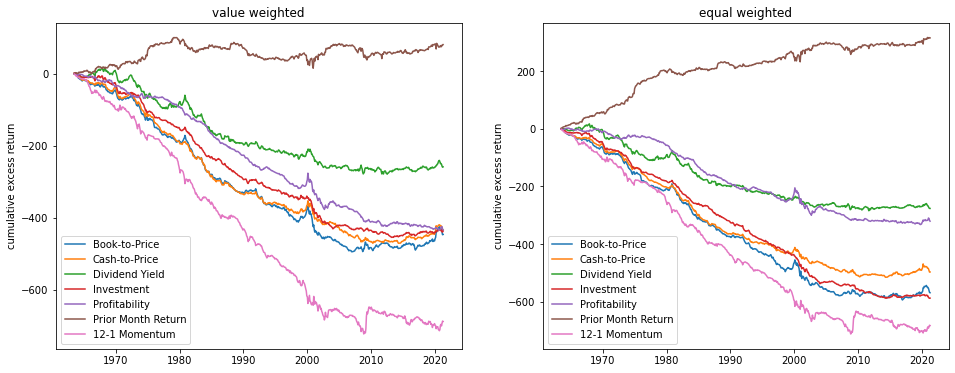

In [59]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
factorReturn_vw= processing().FactrosReturnDataFrame(value_weight,ff_returns)
factorReturnPart3_vw=pd.DataFrame()
for i in range(len(fundamental_title)):
    factorReturnPart3_vw[fundamental_title[i]]=0.5*(factorReturn_vw[i]['small_lo']+factorReturn_vw[i]['Big_lo']-factorReturn_vw[i]['small_hi']-factorReturn_vw[i]['Big_hi'])
rfreturnPart3=factorReturnPart3_vw.join(ff_returns['RF'])['RF'].to_frame()
plt.plot((factorReturnPart3_vw-rfreturnPart3.values).apply(cum_ret))
plt.legend(fundamental_title)
plt.title('value weighted')
plt.ylabel('cumulative excess return')

plt.subplot(1,2,2)
factorReturn_ew= processing().FactrosReturnDataFrame(equal_weight,ff_returns)
factorReturnPart3_ew=pd.DataFrame()
for i in range(len(fundamental_title)):
    factorReturnPart3_ew[fundamental_title[i]]=0.5*(factorReturn_ew[i]['small_lo']+factorReturn_ew[i]['Big_lo']-factorReturn_ew[i]['small_hi']-factorReturn_ew[i]['Big_hi'])
rfreturnPart3=factorReturnPart3_ew.join(ff_returns['RF'])['RF'].to_frame()
plt.plot((factorReturnPart3_ew-rfreturnPart3.values).apply(cum_ret))
plt.legend(fundamental_title)
plt.title('equal weighted')
plt.ylabel('cumulative excess return')

####  try to build a correlation weighted  portfoilio (12month)

In [60]:
# value_weight_invest['1967-01-1':]


 ### value weight universe 

####  12 month 
 

In [61]:
re12_vw=(factorReturnPart3_vw.iloc[:,:]-rfreturnPart3.values)# the excess return of re12_vw
re12vw=re12_vw.loc['1967-01-01':]
# re12vw

In [62]:
#the rolling 12 month covraince martrix

In [63]:
list1=value_weight_invest['1967-01-1':].index.astype(str)
# len(list1)
# for i in range (652):
#     print (list1[i])

In [64]:
len(rfreturnPart3.values)
print(len(factorReturnPart3_vw))

694


In [65]:
cov12_vw=(factorReturnPart3_vw.iloc[:]-rfreturnPart3.values).rolling(12).cov()
cov12vw=cov12_vw.loc['1967-01-01':]

In [66]:
cov12vw

Book-to-Price  Cash-to-Price  Dividend Yield  \
1967-01-01 Book-to-Price            4.102781       3.175676        5.543452   
           Cash-to-Price            3.175676       3.327114        5.304647   
           Dividend Yield           5.543452       5.304647       12.131072   
           Investment               3.693724       3.363245        7.792764   
           Profitability           -3.167315      -2.290715       -5.050973   
...                                      ...            ...             ...   
2021-04-01 Dividend Yield          11.650694       8.256138       12.009851   
           Investment               4.579502       2.004601        2.519818   
           Profitability            1.348505       1.756478       -2.364978   
           Prior Month Return      -6.621133      -4.666090       -7.076666   
           12-1 Momentum          -12.108903     -11.729955      -14.861854   

                               Investment  Profitability  Prior Month Return  \
1967-01-01 Book-to-Price         3.693724      -3.167315            3.270194   
           Cash-to-Price         3.363245      -2.290715            2.775274   
           Dividend Yield        7.792764      -5.050973            6.199687   
           Investment            7.722397      -4.678109            5.878290   
           Profitability        -4.678109       3.460545           -4.099936   
...                                   ...            ...                 ...   
2021-04-01 Dividend Yield        2.519818      -2.364978           -7.076666   
           Investment            5.758513      -0.720397            0.059778   
           Profitability        -0.720397       8.088403            1.349203   
           Prior Month Return    0.059778       1.349203            6.252351   
           12-1 Momentum        -0.049184      -0.051534            8.213486   

                               12-1 Momentum  
1967-01-01 Book-to-Price           -5.310817  
           Cash-to-Price           -5.507761  
           Dividend Yield         -10.939669  
           Investment              -4.652990  
           Profitability            3.371943  
...                                      ...  
2021-04-01 Dividend Yield         -14.861854  
           Investment              -0.049184  
           Profitability           -0.051534  
           Prior Month Return       8.213486  
           12-1 Momentum           29.835864  

[4564 rows x 7 columns]

In [67]:
# this function return the covraince matrix for each month
def cov_i(i):
        index=list1[i]
        cov_i=cov12vw.loc[index]
#         corr_all.append(corr_i)
        return cov_i

In [68]:
def ret_i(i):
        index=list1[i]
        ret_i=re12vw.loc[index]
#         corr_all.append(corr_i)
        return ret_i


 ###  define a  max  sharp ratio  weighted function

In [69]:
def calc_sp_weights(ret,cov):
    def cal_last_sharp(x):
        w=np.ones(7)*x
        sharp_last=(w@ret)/np.sqrt(w.T@cov@w)
        f=-(sharp_last)# returen the shrap ratio for last month
        return f
    x0=np.ones(7)*0.01
    bounds = [(-1, 1) for i in range(7)]
    constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
    res = scipy.optimize.minimize(cal_last_sharp, x0, method='SLSQP', bounds=bounds, constraints=constraints, )
    return res.x

In [70]:
w_vw12=[]

for i in range(len(list1)):
    cov=cov_i(i-1)
    ret=ret_i(i-1)
    w=calc_sp_weights(ret,cov)
    w_vw12.append(w)# weight try to maximize the last term sharp ratio
    

In [71]:
# factorReturnPart3_vw.loc['1967-01-01':] to total return

In [72]:
data_weight_vw=pd.DataFrame(w_vw12)
data_weight_vw.index=re12vw.index
data_weight_vw.columns=factorReturnPart3_vw.columns
# data_weight_vw[~(data_weight_vw['month']=='01')]=np.nan
data_weight_vw=data_weight_vw.ffill()
vw_12=(re12vw*data_weight_vw).sum(axis=1).values

In [73]:
vw_12_data=pd.DataFrame(vw_12)
vw_12_data.index=re12vw.index
vw_12_data.columns=['sharp ratio weighted portfolio_vw_12']
vw_12_data

,sharp ratio weighted portfolio_vw_12
1967-01-01,1.390074
1967-02-01,-4.500031
1967-03-01,-1.087295
1967-04-01,-2.851712
1967-05-01,-4.647935
...,...
2020-12-01,1.224136
2021-01-01,-1.247860
2021-02-01,-3.361987
2021-03-01,-3.182883


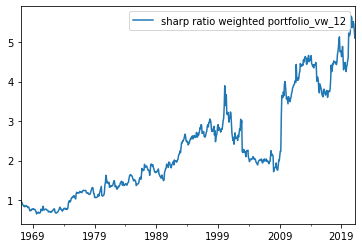

In [74]:
(vw_12_data/100 + 1).cumprod().plot()

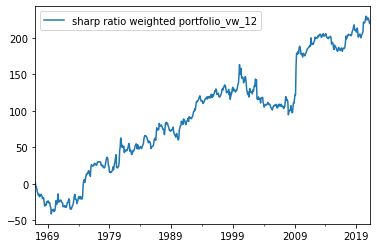

In [75]:
vw_12_data.cumsum().plot()

In [76]:
re36_vw=(factorReturnPart3_vw.iloc[:,:]-rfreturnPart3.values)# the excess return of re12_vw
re36vw=re12_vw.loc['1967-01-01':]

In [77]:
cov36_vw=(factorReturnPart3_vw.iloc[:,:]-rfreturnPart3.values).rolling(36).cov()
cov36vw=cov36_vw.loc['1967-01-01':]
# cov12vw

In [78]:
def cov_i_v36(i):
        index=list1[i]
        cov_i=cov36vw.loc[index]
#         corr_all.append(corr_i)
        return cov_i

In [79]:
def ret_i_v36(i):
        index=list1[i]
        ret_i=re36vw.loc[index]
        return ret_i


In [80]:
w_vw36=[]

for i in range(len(list1)):
    cov=cov_i_v36(i-1)
    ret=ret_i_v36(i-1)
    w=calc_sp_weights(ret,cov)
    w_vw36.append(w)# weight try to maximize the last term sharp ratio
    

In [81]:
data_weight_vw=pd.DataFrame(w_vw36)
data_weight_vw.index=re12vw.index
data_weight_vw.columns=factorReturnPart3_vw.columns
# data_weight_vw[~(data_weight_vw['month']=='01')]=np.nan
data_weight_vw=data_weight_vw.ffill()
vw_36=(re36vw*data_weight_vw).sum(axis=1).values

In [82]:
vw_36_data=pd.DataFrame(vw_36)
vw_36_data.index=re36vw.index
vw_36_data.columns=['sharp ratio weighted portfolio_vw_36']
vw_12_data

,sharp ratio weighted portfolio_vw_12
1967-01-01,1.390074
1967-02-01,-4.500031
1967-03-01,-1.087295
1967-04-01,-2.851712
1967-05-01,-4.647935
...,...
2020-12-01,1.224136
2021-01-01,-1.247860
2021-02-01,-3.361987
2021-03-01,-3.182883


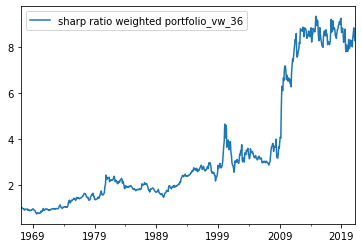

In [83]:
(vw_36_data/100 + 1).cumprod().plot()

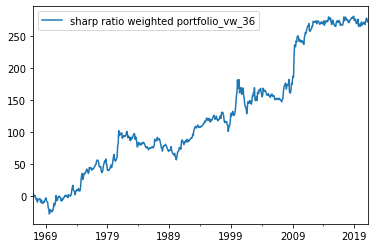

In [84]:
vw_36_data.cumsum().plot()

 ### equal weight universe 

In [85]:
re_ew=(factorReturnPart3_ew.iloc[:,:]-rfreturnPart3.values)
cov_ew_12=(factorReturnPart3_ew.iloc[:,:]-rfreturnPart3.values).rolling(12).cov()
cov_ew_36=(factorReturnPart3_ew.iloc[:,:]-rfreturnPart3.values).rolling(36).cov()

 #### 12 month 

In [86]:
cov12ew=cov_ew_12.loc['1967-01-01':]
re12ew=re_ew.loc['1967-01-01':]

In [87]:
def cov_i_ew(i):
        index=list1[i]
        cov_i=cov12ew.loc[index]
        return cov_i

In [88]:
def ret_i_ew(i):
        index=list1[i]
        ret_i=re12ew.loc[index]

        return ret_i

In [89]:
w_ew12=[]

for i in range(len(list1)):
    cov=cov_i_ew(i-1)
    ret=ret_i_ew(i-1)
    w=calc_sp_weights(ret,cov)
    w_ew12.append(w)# weight try to maximize the last term sharp ratio

In [90]:
data_weight_ew=pd.DataFrame(w_ew12)
data_weight_ew.index=re12ew.index
data_weight_ew.columns=factorReturnPart3_ew.columns
# data_weight_vw[~(data_weight_vw['month']=='01')]=np.nan
data_weight_ew=data_weight_ew.ffill()
ew_12=(re12ew*data_weight_ew).sum(axis=1).values
ew_12_data=pd.DataFrame(ew_12)
ew_12_data.index=re12ew.index
ew_12_data.columns=['sharp ratio weighted portfolio_ew_12']

In [91]:
data_weight_ew.sum(axis=1)

1967-01-01    1.0
1967-02-01    1.0
1967-03-01    1.0
1967-04-01    1.0
1967-05-01    1.0
             ... 
2020-12-01    1.0
2021-01-01    1.0
2021-02-01    1.0
2021-03-01    1.0
2021-04-01    1.0
Freq: MS, Length: 652, dtype: float64

In [92]:
ew_12_data

,sharp ratio weighted portfolio_ew_12
1967-01-01,2.411812
1967-02-01,0.284628
1967-03-01,0.114945
1967-04-01,0.455848
1967-05-01,-1.682123
...,...
2020-12-01,2.893699
2021-01-01,-2.414759
2021-02-01,-0.684552
2021-03-01,7.585484


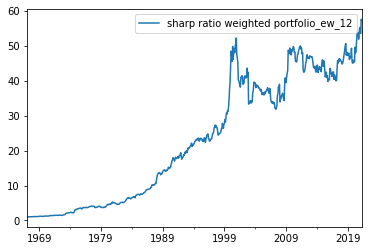

In [93]:
(ew_12_data/100 + 1).cumprod().plot()

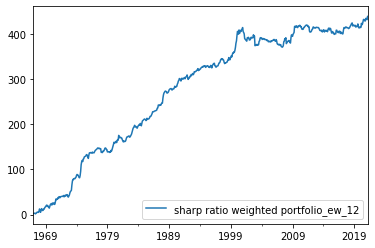

In [94]:
ew_12_data.cumsum().plot()

 #### 36 month 

In [95]:
cov36ew=cov_ew_36.loc['1967-01-01':]
re36ew=re_ew.loc['1967-01-01':]

In [96]:
def cov_i_ew(i):
        index=list1[i]
        cov_i=cov36ew.loc[index]
        return cov_i

In [97]:
def ret_i_ew(i):
        index=list1[i]
        ret_i=re36ew.loc[index]

        return ret_i

In [98]:
w_ew36=[]

for i in range(len(list1)):
    cov=cov_i_ew(i-1)
    ret=ret_i_ew(i-1)
    w=calc_sp_weights(ret,cov)
    w_ew36.append(w)# weight try to maximize the last term sharp ratio

In [99]:
data_weight_ew=pd.DataFrame(w_ew36)
data_weight_ew.index=re36ew.index
data_weight_ew.columns=factorReturnPart3_ew.columns
ew_36=(re36ew*data_weight_ew).sum(axis=1).values
ew_36_data=pd.DataFrame(ew_36)
ew_36_data.index=re36ew.index
ew_36_data.columns=['sharp ratio weighted portfolio_ew_36']

In [100]:
ew_36_data

,sharp ratio weighted portfolio_ew_36
1967-01-01,2.997472
1967-02-01,-1.532466
1967-03-01,-0.231573
1967-04-01,1.870164
1967-05-01,-2.492800
...,...
2020-12-01,2.940845
2021-01-01,-1.065586
2021-02-01,-0.496953
2021-03-01,4.424994


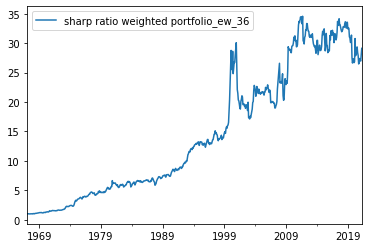

In [101]:
(ew_36_data/100 + 1).cumprod().plot()

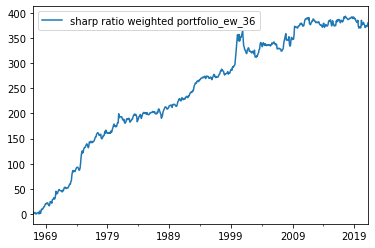

In [102]:
ew_36_data.cumsum().plot()

In [103]:
ew36_2000=ew_36_data.loc['2010-01-01':]
# ew36_2000
vw36_2000=vw_36_data.loc['2010-01-01':]

vw12_2000=vw_12_data.loc['2010-01-01':]
ew12_2000=ew_12_data.loc['2010-01-01':]

In [104]:
a=(ew36_2000/100+1).cumprod()
b=(vw36_2000/100+1).cumprod()
c=(vw12_2000/100+1).cumprod()
d=(ew12_2000/100+1).cumprod()

Text(0, 0.5, 'cumulative  return')

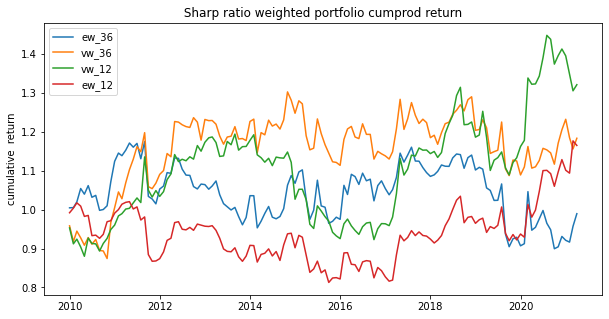

In [105]:
plt.figure(figsize=(10,5))

plt.plot(a)
plt.plot(b)
plt.plot(c)
plt.plot(d)
plt.legend(['ew_36','vw_36','vw_12','ew_12'])
plt.title(' Sharp ratio weighted portfolio cumprod return ')
plt.ylabel('cumulative  return')

In [106]:
ew36_10_annual_sharp=(ew36_2000.mean()/np.std(ew36_2000))*np.sqrt(12)#change to yearly
vw36_10_annual_sharp=(vw36_2000.mean()/np.std(vw36_2000))*np.sqrt(12)
ew12_10_annual_sharp=(ew12_2000.mean()/np.std(ew12_2000))*np.sqrt(12)
vw12_10_annual_sharp=(vw12_2000.mean()/np.std(vw12_2000))*np.sqrt(12)

In [107]:
ew36_10_annua_ret=ew36_2000.mean()*12
vw36_10_annua_ret=vw36_2000.mean()*12
ew12_10_annua_ret=ew12_2000.mean()*12
vw12_10_annua_ret=vw12_2000.mean()*12

In [108]:
print(ew36_10_annual_sharp,vw36_10_annual_sharp,ew12_10_annual_sharp,vw12_10_annual_sharp)

sharp ratio weighted portfolio_ew_36    0.0524
dtype: float64 sharp ratio weighted portfolio_vw_36    0.187816
dtype: float64 sharp ratio weighted portfolio_ew_12    0.186218
dtype: float64 sharp ratio weighted portfolio_vw_12    0.279305
dtype: float64


In [109]:
print(ew36_10_annua_ret,vw36_10_annua_ret,ew12_10_annua_ret,vw12_10_annua_ret)

sharp ratio weighted portfolio_ew_36    0.627203
dtype: float64 sharp ratio weighted portfolio_vw_36    2.136865
dtype: float64 sharp ratio weighted portfolio_ew_12    1.829194
dtype: float64 sharp ratio weighted portfolio_vw_12    3.046578
dtype: float64


In [110]:
e=(ew_36_data).cumsum()
f=(vw_36_data).cumsum()
g=(vw_12_data).cumsum()
h=(ew_12_data).cumsum()

Text(0, 0.5, 'cumulative  return')

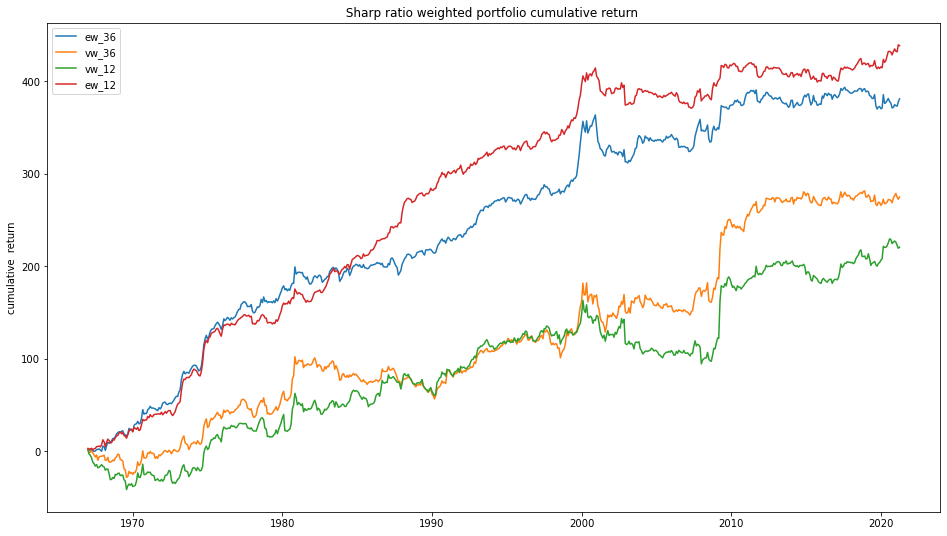

In [111]:
plt.figure(figsize=(16,9))

plt.plot(e)
plt.plot(f)
plt.plot(g)
plt.plot(h)
plt.legend(['ew_36','vw_36','vw_12','ew_12'])
plt.title(' Sharp ratio weighted portfolio cumulative return  ')
plt.ylabel('cumulative  return')

### minimum cov model

In [112]:
def calc_mincov_weights(cov):
    def minv(x):
        w=np.ones(7)*x
        cov_last=w.T@cov@w
        f=cov_last# returen cov for look back period.
        return f
    x0=np.ones(7)*0.01
    bounds = [(-1, 1) for i in range(7)]
    constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
    res = scipy.optimize.minimize(minv, x0, method='SLSQP', bounds=bounds, constraints=constraints, )
    return res.x

#### value weighted universe

In [113]:
vw_year_return=(factorReturnPart3_vw.iloc[:]-rfreturnPart3.values)

In [114]:
vw_r=vw_year_return.loc['2010-01-01':'2015-01-01']

In [115]:
vw_cov=vw_r.cov()
vw_cov

,Book-to-Price,Cash-to-Price,Dividend Yield,Investment,Profitability,Prior Month Return,12-1 Momentum
Book-to-Price,3.785993,1.614504,-1.061249,1.474419,-0.979834,-1.339238,-0.703575
Cash-to-Price,1.614504,2.205048,1.481158,0.742827,0.821592,0.603153,0.666287
Dividend Yield,-1.061249,1.481158,6.536106,0.266664,2.497423,4.012029,1.312587
Investment,1.474419,0.742827,0.266664,1.540428,-0.044006,0.113900,0.491176
Profitability,-0.979834,0.821592,2.497423,-0.044006,2.609163,1.821628,0.995784
Prior Month Return,-1.339238,0.603153,4.012029,0.113900,1.821628,7.784874,1.560232
12-1 Momentum,-0.703575,0.666287,1.312587,0.491176,0.995784,1.560232,6.087070


In [116]:
w=calc_mincov_weights(vw_cov)

In [117]:
vw_r_test=vw_year_return.loc['2015-02-01':'2016-06-01']
vw_r_test

,Book-to-Price,Cash-to-Price,Dividend Yield,Investment,Profitability,Prior Month Return,12-1 Momentum
2015-02-01,1.80875,1.895,2.345,1.78495,1.16375,3.500,2.830
2015-03-01,0.41075,0.785,1.285,0.50855,-0.09815,-0.040,-3.000
2015-04-01,-1.88150,-1.540,-0.800,0.45065,0.03570,4.070,7.315
2015-05-01,1.09855,1.835,0.790,0.74435,1.82290,2.640,-6.030
2015-06-01,0.73705,2.555,1.230,1.49550,-0.41725,-3.495,-3.065
2015-07-01,4.21235,5.650,2.500,2.49785,-0.10365,-5.115,-10.295
2015-08-01,-2.72720,-1.525,-1.435,-1.24485,-0.69495,1.630,2.085
2015-09-01,-0.39415,1.330,-0.905,0.45485,-1.85890,-3.320,-5.350
2015-10-01,0.25095,-1.320,-0.215,-0.40800,-0.87190,0.890,4.025
2015-11-01,0.49225,1.690,1.510,1.07565,2.63595,0.000,-2.205


In [118]:
vw_test=w*vw_r_test
vw=vw_test.sum(axis=1).values
vw=pd.DataFrame(vw)
vw.index= vw_test.index
vw.columns=['minmun varince weighted portfolio_vw']

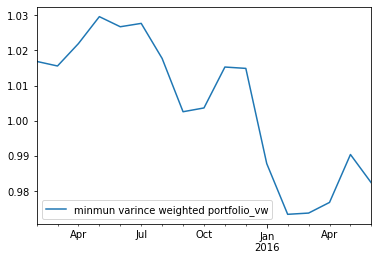

In [119]:
(vw/100+ 1).cumprod().plot()

#### equal weighted universe

In [120]:
ew_year_return=(factorReturnPart3_ew.iloc[:]-rfreturnPart3.values)

In [121]:
ew_r=ew_year_return.loc['2010-01-01':'2015-01-01']

In [122]:
ew_cov=ew_r.cov()
ew_cov

,Book-to-Price,Cash-to-Price,Dividend Yield,Investment,Profitability,Prior Month Return,12-1 Momentum
Book-to-Price,3.274651,1.498635,1.397181,1.226276,0.224052,0.498747,-0.256225
Cash-to-Price,1.498635,1.445868,0.721187,0.498108,0.474803,0.169459,0.523848
Dividend Yield,1.397181,0.721187,4.608169,0.436583,0.867320,3.375596,0.556108
Investment,1.226276,0.498108,0.436583,1.531369,-0.057845,0.208893,0.190050
Profitability,0.224052,0.474803,0.867320,-0.057845,1.972669,1.072917,1.020293
Prior Month Return,0.498747,0.169459,3.375596,0.208893,1.072917,7.056505,1.174314
12-1 Momentum,-0.256225,0.523848,0.556108,0.190050,1.020293,1.174314,5.069138


In [123]:
w=calc_mincov_weights(ew_cov)

In [124]:
ew_r_test=ew_year_return.loc['2015-02-01':'2016-06-01']
ew_r_test

,Book-to-Price,Cash-to-Price,Dividend Yield,Investment,Profitability,Prior Month Return,12-1 Momentum
2015-02-01,2.05115,0.915,2.705,1.91215,1.78990,4.900,3.595
2015-03-01,0.53605,0.580,0.890,0.88600,-1.10655,0.965,-4.025
2015-04-01,-1.52170,-2.035,0.060,-0.60415,0.24005,3.000,7.310
2015-05-01,1.78080,2.090,0.500,1.78475,2.18520,2.870,-5.780
2015-06-01,1.40075,2.425,0.470,2.49280,-0.66135,-3.455,-3.365
2015-07-01,3.63040,3.990,1.135,2.56195,-0.52455,-5.655,-10.445
2015-08-01,-3.60310,-1.755,-1.085,-1.73715,0.16150,1.630,2.180
2015-09-01,-1.22525,1.885,-0.710,0.12390,-1.44520,-3.430,-6.265
2015-10-01,0.65520,-1.750,0.070,-1.59675,-1.04645,1.560,1.955
2015-11-01,1.28850,2.420,2.105,0.11365,2.92485,1.085,-1.915


In [125]:
ew_test=w*ew_r_test
ew=ew_test.sum(axis=1).values
ew=pd.DataFrame(ew)
ew.index= ew_test.index
ew.columns=['minmun varince weighted portfolio_vw']

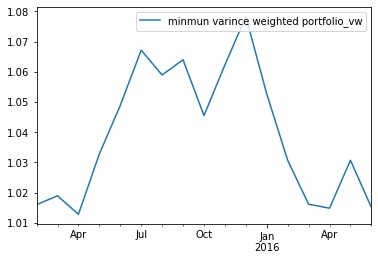

In [126]:
(ew/100+1).cumprod().plot()

### vw ols

In [127]:
# lag12
vw12_return=(factorReturnPart3_vw.iloc[:]-rfreturnPart3.values).rolling(12).mean()[35:-1]
len(vw12_return)

658

In [128]:
#lag36
vw36_return=(factorReturnPart3_vw.iloc[:]-rfreturnPart3.values).rolling(36).mean()[35:-1]
len(vw36_return)

658

In [129]:
# vw return
vw_return = (factorReturnPart3_vw.iloc[:]-rfreturnPart3.values)[36:]
len(vw_return)

658

In [130]:
vw12_return.columns = [col + "_lagged12" for col in vw12_return.columns]
vw12_return.index = vw_return.index

In [131]:
vw36_return.columns = [col + "_lagged36" for col in vw36_return.columns]
vw36_return.index = vw_return.index

In [132]:
vw_reg_df = pd.concat([vw12_return,vw36_return,vw_return], axis =1)

In [133]:
import statsmodels.api as sm

In [134]:
lagged36 = list(vw36_return.columns )
lagged12 = list(vw12_return.columns )
y_return = list(vw_return.columns )

In [135]:
result_list=list()
for i in range(len(lagged36)):
    X = vw_reg_df[[lagged36[i],lagged12[i]]] 
    y = vw_reg_df[y_return[i]]
    X = sm.add_constant(X)
    est = sm.OLS(y, X).fit()
    #print(est.summary())
    result_list.append(est.pvalues.values)

In [136]:
result_list

[array([0.00988239, 0.97763706, 0.00482522]),
 array([0.03195341, 0.21823407, 0.17577673]),
 array([0.03018892, 0.53639828, 0.52313644]),
 array([0.00812758, 0.33283406, 0.03375778]),
 array([8.41670844e-05, 1.46454512e-01, 1.66022630e-03]),
 array([0.34778045, 0.94542981, 0.8868683 ]),
 array([0.01700514, 0.39915154, 0.75468254])]

In [137]:
pvalue_ols_vw = pd.DataFrame(result_list, columns=["constant", "lagged36", "lagged12"])

In [138]:
pvalue_ols_vw["factor"] = list(vw_return.columns )

In [139]:
pvalue_ols_vw

,constant,lagged36,lagged12,factor
0,0.009882,0.977637,0.004825,Book-to-Price
1,0.031953,0.218234,0.175777,Cash-to-Price
2,0.030189,0.536398,0.523136,Dividend Yield
3,0.008128,0.332834,0.033758,Investment
4,0.000084,0.146455,0.001660,Profitability
5,0.347780,0.945430,0.886868,Prior Month Return
6,0.017005,0.399152,0.754683,12-1 Momentum


#### ew ols

In [140]:
# lag12
ew12_return=(factorReturnPart3_ew.iloc[:]-rfreturnPart3.values).rolling(12).mean()[35:-1]
len(ew12_return)

658

In [141]:
#lag36
ew36_return=(factorReturnPart3_ew.iloc[:]-rfreturnPart3.values).rolling(36).mean()[35:-1]
len(ew36_return)

658

In [142]:
# ew return
ew_return = (factorReturnPart3_ew.iloc[:]-rfreturnPart3.values)[36:]
len(ew_return)

658

In [143]:
ew12_return.columns = [col + "_lagged12" for col in ew12_return.columns]
ew12_return.index = ew_return.index

In [144]:
ew36_return.columns = [col + "_lagged36" for col in ew36_return.columns]
ew36_return.index = ew_return.index

In [145]:
ew_reg_df = pd.concat([ew12_return,ew36_return,ew_return], axis =1)

In [146]:
lagged36 = list(ew36_return.columns )
lagged12 = list(ew12_return.columns )
y_return = list(ew_return.columns )

In [147]:
result_list=list()
for i in range(len(lagged36)):
    X = ew_reg_df[[lagged36[i],lagged12[i]]] 
    y = ew_reg_df[y_return[i]]
    X = sm.add_constant(X)
    est = sm.OLS(y, X).fit()
    #print(est.summary())
    result_list.append(est.pvalues.values)

In [148]:
result_list

[array([0.00561075, 0.54599387, 0.10699663]),
 array([0.02523508, 0.06745917, 0.32362521]),
 array([0.02384221, 0.23157797, 0.76529059]),
 array([0.00436037, 0.16301311, 0.06339362]),
 array([0.0003841 , 0.06467016, 0.00027457]),
 array([0.01490605, 0.74449188, 0.90766408]),
 array([0.01349222, 0.65106152, 0.40196062])]

In [149]:
pvalue_ols_ew = pd.DataFrame(result_list, columns=["constant", "lagged36", "lagged12"])

In [150]:
pvalue_ols_ew["factor"] = list(ew_return.columns )

In [151]:
pvalue_ols_ew

,constant,lagged36,lagged12,factor
0,0.005611,0.545994,0.106997,Book-to-Price
1,0.025235,0.067459,0.323625,Cash-to-Price
2,0.023842,0.231578,0.765291,Dividend Yield
3,0.004360,0.163013,0.063394,Investment
4,0.000384,0.064670,0.000275,Profitability
5,0.014906,0.744492,0.907664,Prior Month Return
6,0.013492,0.651062,0.401961,12-1 Momentum


### ARMA

In [152]:
vw_return

,Book-to-Price,Cash-to-Price,Dividend Yield,Investment,Profitability,Prior Month Return,12-1 Momentum
1966-07-01,-1.34175,-1.825,-1.545,-2.12300,0.10465,0.890,1.035
1966-08-01,-0.84545,-0.560,-2.810,-1.18355,-0.46135,-0.080,1.695
1966-09-01,-0.89430,-0.485,-2.140,-2.89845,1.25460,0.665,1.330
1966-10-01,-3.30505,-1.610,-2.900,-4.73270,3.19360,-1.920,4.680
1966-11-01,4.12515,4.610,9.645,6.12860,-4.57010,8.670,-6.130
...,...,...,...,...,...,...,...
2020-12-01,1.34915,0.835,0.350,-0.00810,2.13730,-3.090,2.405
2021-01-01,-2.85125,-0.900,-2.145,-4.68175,3.33105,0.380,-4.345
2021-02-01,-7.08005,-5.825,-5.240,1.96800,-0.08850,4.110,7.670
2021-03-01,-7.39730,-6.300,-2.955,-3.43670,-6.43055,-0.300,5.830


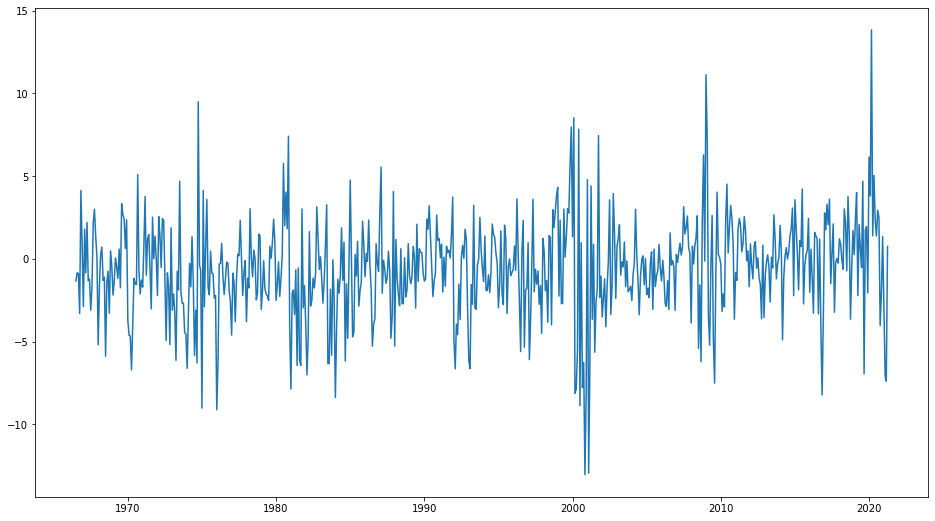

In [153]:
plt.figure(figsize=(16,9))

plt.plot(vw_return["Book-to-Price"])

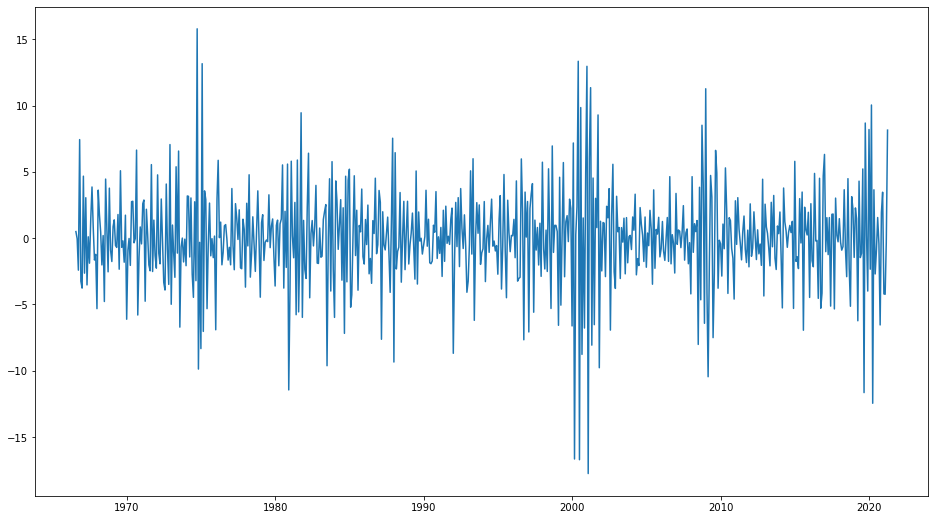

In [154]:
plt.figure(figsize=(16,9))
plt.plot(vw_return["Book-to-Price"].diff(1))

In [155]:
from arch.unitroot import ADF

In [156]:
print(ADF(vw_return["Book-to-Price"], max_lags=36).summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                -14.908
P-value                         0.000
Lags                                1
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [157]:
print(ADF(vw_return["Book-to-Price"].diff(1).dropna()).summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                -10.131
P-value                         0.000
Lags                               15
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [158]:
from statsmodels.graphics.tsaplots import *

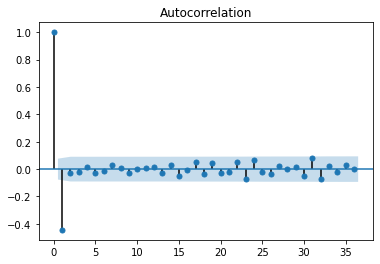

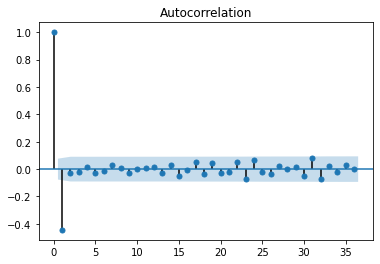

In [159]:
plot_acf(vw_return["Book-to-Price"].diff(1).dropna(), lags=36)

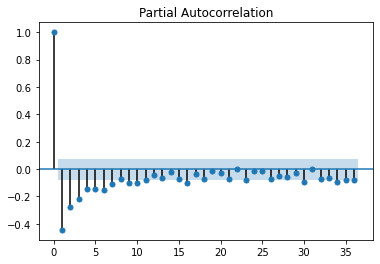

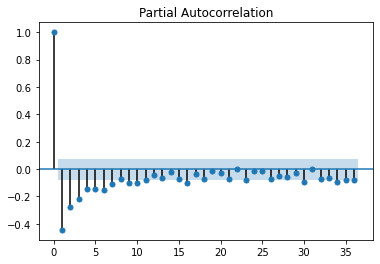

In [160]:
plot_pacf(vw_return["Book-to-Price"].diff(1).dropna(), lags=36)